In [1]:
""" 
Simple implementation of a ML- Model using logistic regression
Andrej Artuschenko

Oriented on:
https://www.simplilearn.com/tutorials/machine-learning-tutorial/logistic-regression-in-python?tag=lasso%20regression

"""

# module provides reguar expression matching operations

import re

In [2]:
#import libraries and methods

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [3]:
# determining the total number of images and labels

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


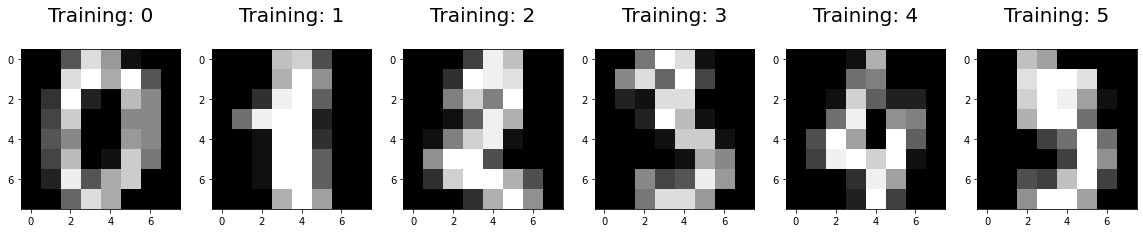

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:6], digits.target[0:6])):
    plt.subplot(1, 6, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [20]:
# dividing dataset into train and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=2)

In [21]:
print(x_train.shape)

(1347, 64)


In [22]:
print(y_train.shape)

(1347,)


In [23]:
print(x_test.shape)

(450, 64)


In [24]:
print(y_test.shape)

(450,)


In [25]:
# import the logistic regression model

from sklearn.linear_model import LogisticRegression

In [26]:
# train model

logisticRegr = LogisticRegression() 
logisticRegr.fit(x_train, y_train) #passing our data set to train our model

# fit method is for training data

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
#predicting the output of the first elemnt of the test set

print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [28]:
# prediction for the first 10 elements

logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [29]:
predictions = logisticRegr.predict(x_test)

In [30]:
# determining the accuracy of the model 

score = logisticRegr.score(x_test, y_test)
print(score)

0.9466666666666667


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [32]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  2  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  1  2  0]
 [ 0  0  0  0 36  0  0  0  3  1]
 [ 0  1  0  0  1 50  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  0  0  0  0  0  0  0 39  1]
 [ 0  0  0  2  0  1  0  0  2 34]]


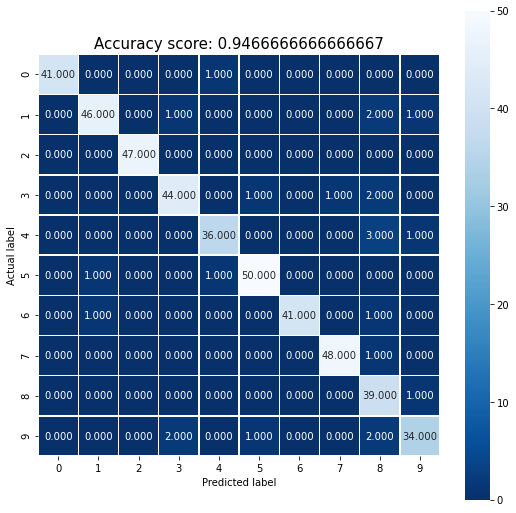

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score) 
plt.title(all_sample_title, size = 15);

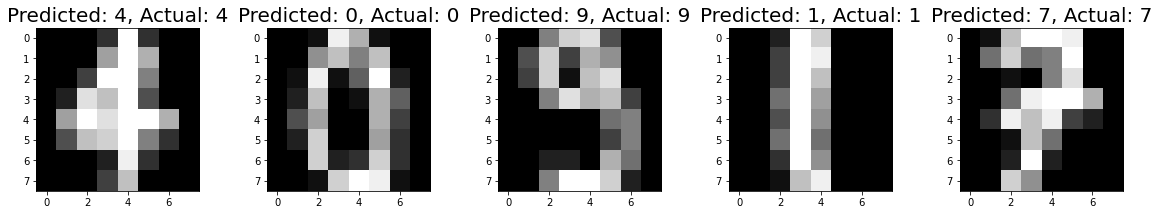

In [34]:
# representing predictions and actual output

index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index += 1
    
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:5]):
    plt.subplot(1,5, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}" .format(predictions[wrong], y_test[wrong]), fontsize=20)